# Getting Started 👋

Welcome to Deepnote! We've prepared a 5 minute guide to Deepnote. If you just want to play around with Deepnote on your own, that's fine too! You can always come back here when you're ready.

## Deepnote in 5 Minutes


1. ### [The Deepnote notebook](01_notebook.ipynb) 🏃


2. ### [Upload or connect your data 🔗](02_integrations.ipynb)


3. ### [Work with others 🤝](03_collaboration.ipynb)


4. ### [Publish your work 📚](04_publishing.ipynb)

## Next Steps 👣
1. Go to your [Dashboard](https://deepnote.com/dashboard) to create your first project.
1. Say Hi in [Deepnote Community](https://community.deepnote.com/c/forum)!
1. If you ever need help, hit the question mark in the bottom left corner and **chat with us**! We're always happy to assist you. 

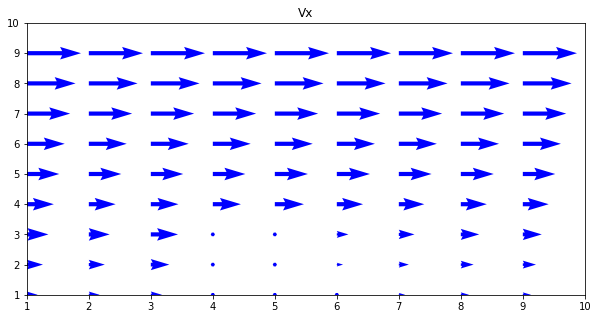

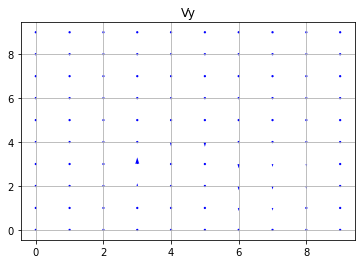

In [1]:
from logging import RootLogger
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as p 
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pylab as p 
from matplotlib import pyplot, cm
from numpy import *

import time 

#Parámetros iniciales
YMAX = 10
XMAX = 10
PPX = 1
PNX = 1
H = 1
OMEGA = 0.1
N_ITERATIONS = 1000

#Valores iniciales de la vara
INITIAL_LENGTH = 0
FINAL_LENGTH = math.floor(YMAX/2)

INITIAL_WIDTH = math.floor(XMAX/3)
FINAL_WIDTH = INITIAL_WIDTH*2


initial_field_vx = [[0 for i in range(XMAX)] for j in range(YMAX)] #listo
r_field_vx = [[0 for i in range(XMAX)] for j in range(YMAX)] #listo
r_field_vy = [[0 for i in range(XMAX)] for j in range(YMAX)] #listo
velocity_field_vx = [[0 for i in range(XMAX)] for j in range(YMAX)] #listo

velocity_field_vy = [[0 for i in range(XMAX)] for j in range(YMAX)] #crea matriz inicial vy
initial_field_vy = [[0 for i in range(XMAX)] for j in range(YMAX)] #listo

total_velocity = [[0 for i in range(XMAX)] for j in range(YMAX)] #listo #To sum both Vx and Vy


def evalRvx(h,Vin,Vip,Vjp,Vjn,Cvx,Cvy,Pcn,Pcp):
  return (1/4)*(Vin + Vip + Vjn + Vjp - (h/2)*Cvx*(Vin - Vip) -(h/2)*Cvy*(Vjn - Vjp) - (h/2)*(Pcn - Pcp))- Cvx

def evalRvy(h,Vin,Vip,Vjp,Vjn,Cvx,Cvy,Pcn,Pcp):
  return (1/4)*(Vin + Vip + Vjn + Vjp - (h/2)*Cvx*(Vin - Vip) -(h/2)*Cvy*(Vjn - Vjp) - (h/2)*(Pcn - Pcp)) - Cvy

def initializeVx(r_field_vx, initial_field_vx):
  for j in range(YMAX):  
        for i in range(XMAX):
            if (i >= INITIAL_WIDTH and i <= FINAL_WIDTH) and (j >= FINAL_LENGTH):
                r_field_vx[j][i] = 0
                initial_field_vx[j][i] = 0
            else:
                r_field_vx[j][i] = YMAX-j
                initial_field_vx[j][i] = YMAX-j
 
def setBoundariesVy(velocity_field_vy,initial_field_vx):
  for j in range(YMAX):
    for i in range(XMAX):
      #frontal
      if(j>=FINAL_LENGTH and i == INITIAL_WIDTH):
        velocity_field_vy[j][i] = -2*(initial_field_vx[j][i-1]-initial_field_vx[j][i])/(H*H);
      #arriba
      elif(j==FINAL_LENGTH and (i >= INITIAL_WIDTH and i<FINAL_WIDTH)):
        velocity_field_vy[j][i] = -2*(initial_field_vx[j-1][i]-initial_field_vx[j][i])/(H*H);
      #detrás
      elif(j>=FINAL_LENGTH and i == FINAL_WIDTH):
        velocity_field_vy[j][i] = -2*(initial_field_vx[j][i+1]-initial_field_vx[j][i])/(H*H);


def calculateVxRValues(r_field_vx, velocity_field_vx,velocity_field_vy):
    for j in range(1, YMAX):
        for i in range(1, XMAX):
            if(i > INITIAL_WIDTH and i < FINAL_WIDTH) and (j > FINAL_LENGTH):
                r_field_vx[j][i] = 0
            elif i == XMAX - 1 and j == YMAX - 1:
                r_field_vx[j][i] = evalRvx(H, 0.0,velocity_field_vx[j][i-1],
                                          0.0, velocity_field_vx[j-1][i], velocity_field_vx[j][i], velocity_field_vy[j][i], PPX, PNX)
            elif j == 0 and i == XMAX - 1:
                r_field_vx[j][i] = evalRvx(H, 0.0, velocity_field_vx[j][i-1],
                                          velocity_field_vx[j+1][i],0.0, velocity_field_vx[j][i], velocity_field_vy[j][i], PPX, PNX)

            elif j == 0:
                r_field_vx[j][i] = evalRvx(H, velocity_field_vx[j][i+1], velocity_field_vx[j][i-1], velocity_field_vx[j+1][i], 0.0, velocity_field_vx[j][i], velocity_field_vy[j][i],PPX, PNX)

            elif j == (YMAX - 1):
                r_field_vx[j][i] = evalRvx(H, velocity_field_vx[j][i+1], velocity_field_vx[j][i-1],
                                          0.0,velocity_field_vx[j-1][i], velocity_field_vx[j][i], velocity_field_vy[j][i],PPX, PNX )

            elif i == (XMAX - 1):
                r_field_vx[j][i] = evalRvx(H, velocity_field_vx[j][i-1], velocity_field_vx[j][i-1],
                                          velocity_field_vx[j+1][i], velocity_field_vx[j-1][i], velocity_field_vx[j][i], velocity_field_vy[j][i], PPX, PNX)

            else:
                r_field_vx[j][i] = evalRvx(H, velocity_field_vx[j][i+1], velocity_field_vx[j][i-1],
                                          velocity_field_vx[j+1][i], velocity_field_vx[j-1][i], velocity_field_vx[j][i], velocity_field_vy[j][i], PPX, PNX)
            velocity_field_vx[j][i] = velocity_field_vx[j][i] + OMEGA*r_field_vx[j][i]
    return velocity_field_vx


def calculateVyRValues(r_field_vy, velocity_field_vx,velocity_field_vy):
    for j in range(1, YMAX - 1):
        for i in range(1, XMAX - 1):
            if(i > INITIAL_WIDTH and i < FINAL_WIDTH) and (j > FINAL_LENGTH):
                r_field_vy[j][i] = 0

            elif i == XMAX - 1 and j == YMAX - 1:
                r_field_vy[j][i] = evalRvy(H, 0.0,velocity_field_vy[j][i-1],
                                          0.0, velocity_field_vy[j-1][i], velocity_field_vx[j][i], velocity_field_vy[j][i], PPX, PNX)

            elif j == 0 and i == XMAX - 1:
                r_field_vy[j][i] = evalRvy(H, 0.0, velocity_field_vy[j][i-1],
                                          velocity_field_vy[j+1][i],0.0, velocity_field_vx[j][i], velocity_field_vy[j][i], PPX, PNX)

            elif j == 0:
                r_field_vy[j][i] = evalRvy(H, velocity_field_vy[j][i+1], velocity_field_vy[j][i-1], velocity_field_vy[j+1][i], 0.0, velocity_field_vx[j][i], velocity_field_vy[j][i],PPX, PNX)

            elif j == (YMAX - 1):
                r_field_vy[j][i] = evalRvy(H, velocity_field_vy[j][i+1], velocity_field_vy[j][i-1],
                                          0.0,velocity_field_vy[j-1][i], velocity_field_vx[j][i], velocity_field_vy[j][i],PPX, PNX )

            elif i == (XMAX - 1):
                r_field_vy[j][i] = evalRvy(H, 0.0, velocity_field_vy[j][i-1],
                                          velocity_field_vy[j+1][i], velocity_field_vy[j-1][i], velocity_field_vx[j][i], velocity_field_vy[j][i], PPX, PNX)

            else:
                r_field_vy[j][i] = evalRvy(H, velocity_field_vy[j][i+1], velocity_field_vy[j][i-1],
                                          velocity_field_vy[j+1][i], velocity_field_vy[j-1][i], velocity_field_vx[j][i], velocity_field_vy[j][i], PPX, PNX)
                
            velocity_field_vy[j][i] = velocity_field_vy[j][i] + OMEGA*r_field_vy[j][i]


def showMatrix(matrix):
    matrix_to_show = np.array(matrix)
    for line in matrix_to_show:
        print(' '.join(map(str, line)))

#j es X por conveniencia del for
#i es Y por conveniencia del for
def showPlotVx(velocity_field_vx):
  for i in range(0, YMAX):
    for j in range(0,XMAX):

      plt.quiver(j, i, velocity_field_vx[(YMAX-1)-i][j], 0, color='b',units='xy', scale=9)
      plt.title("Vx")
 
  # x-lim and y-lim
  plt.xlim(1, XMAX)
  plt.ylim(1, YMAX)
 
  # Show plot with grid
  #plt.grid()
  plt.show()

def showPlotVy(velocity_field_vy):
  for i in range(0, YMAX):
    for j in range(0,XMAX):

      plt.quiver(j, i, 0, velocity_field_vy[(YMAX-1)-i][j], color='b', units='xy', scale=9)
      plt.title("Vy")
 
  # x-lim and y-lim
  #plt.xlim(1, XMAX)
  #plt.ylim(1, YMAX)
 
  # Show plot with grid
  plt.grid()
  plt.show()

def showPlot(velocity_field_vx, velocity_field_vy):
  for i in range(0, YMAX):
    for j in range(0,XMAX):
      plt.quiver(j, i, velocity_field_vx[i][j], velocity_field_vy[i][j], units='xy', color='w',scale=9)

  plt.title("Campo vectorial del recorrido del fluido")    
  # x-lim and y-lim
  #plt.xlim(1, XMAX)
  #plt.ylim(1,YMAX)
 
  # Show plot with grid
  #plt.grid()
  #plt.show()
  
def iterate(initial_field_vx,  initial_field_vy, velocity_field_vx, velocity_field_vy, r_field_vx, r_field_vy, total_velocity):
    previous_field_vx = initial_field_vx
    previous_field_vy = initial_field_vy
    velocity_field_vx = initial_field_vx
    velocity_field_vy = initial_field_vy
    for i in range(N_ITERATIONS):
      setBoundariesVy(velocity_field_vy, previous_field_vx)
      calculateVxRValues(r_field_vx, velocity_field_vx, velocity_field_vy) #we also relax the fluid here
      calculateVyRValues(r_field_vy, velocity_field_vx, velocity_field_vy) #we also relax the fluid here
      previous_field_vx = velocity_field_vx
      """
      if(i%100==0):
        output.clear()
        plt.figure(figsize=[10.0,10.0])
        showPlot(velocity_field_vx, velocity_field_vy)
        sumVelocities(total_velocity, velocity_field_vx, velocity_field_vy)
        plotVector(total_velocity,velocity_field_vx,velocity_field_vy,"Campo vectorial del recorrido del fluido")
      """
    plt.figure(figsize=[10,5])
    showPlot(velocity_field_vx, velocity_field_vy)
    #showPlotVx(velocity_field_vx)
    sumVelocities(total_velocity, velocity_field_vx, velocity_field_vy)
    showPlotVx(velocity_field_vx)
    showPlotVy(velocity_field_vy)
    #plotVector(total_velocity,velocity_field_vx,velocity_field_vy,"Campo vectorial del recorrido del flujo V(x,y)")


    

def sumVelocities(total_velocity, velocity_field_vx, velocity_field_vy):
  for j in range(YMAX):
    for i in range(XMAX):
      total_velocity[j][i] = velocity_field_vx[j][i] + velocity_field_vy[j][i]

def colorBar(total_velocity, title):
  plt.imshow(total_velocity)
  plt.title(title)
  plt.colorbar()
  plt.show()

def plotVector(velocity,velocityfield_vx,velocity_field_vy,title):

    #showMatrix(velocity)
    plt.imshow(velocity)
    plt.title(title)
    plt.colorbar()
    plt.show()
    #time.sleep(1)
  

if __name__ == '__main__':
    initializeVx(r_field_vx, initial_field_vx)
    iterate(initial_field_vx, initial_field_vy, velocity_field_vx, velocity_field_vy, r_field_vx, r_field_vy, total_velocity)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f89b38c5-96be-4dcf-9b5d-e1b96d9b5992' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>